In [1]:
# This reads in a csv which includes noise levels in an ADI frame, and then uses
# those levels of noise and a given host star amplitude to make a crude contrast 
# curve. (Note that there are no fake companions involved.)

# Created 2019 July 11 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make a contrast curve

In [2]:
# read in the csv

#noise_data = pd.read_csv("/Users/nyumbani/Downloads/pipeline_10_signal_to_noise/test_csv_file.csv")
#noise_data = pd.read_csv("./csv_sn_check_cubes/classical_adi_csv_file.csv")
#noise_data = pd.read_csv("./csv_sn_check_cubes/quad4_circ_ring_mask_csv_file.csv")
#noise_data = pd.read_csv("./csv_sn_check_cubes/quad4_circ_mask_csv_file.csv")
#noise_data = pd.read_csv("./csv_sn_check_cubes/quad4_mask_csv_file.csv")
#noise_data = pd.read_csv("./csv_sn_check_cubes/pca_full_frame_csv_file.csv")
#noise_data = pd.read_csv("./csv_sn_check_cubes/quad4_mask_20191026_csv_file.csv")
#noise_data = pd.read_csv("./csv_sn_check_cubes/quad4_circ_mask_20191026_csv_file.csv")
#noise_data = pd.read_csv("./csv_sn_check_cubes/quad4_circ_ring_mask_20191026_csv_file.csv")
#noise_data = pd.read_csv("./csv_sn_check_cubes/tesselation_10psfs_each_region_20191026_csv_file.csv")
#noise_data = pd.read_csv("/Users/nyumbani/Downloads/pipeline_10_signal_to_noise/"+
#                         "cubes/test_no_planets_191108/test_no_planets_csv_file.csv")
noise_data = pd.read_csv("/Users/nyumbani/Downloads/pipeline_10_signal_to_noise/"+
                         "cubes/test_with_planets_191108/test_with_planets_csv_file.csv")

In [3]:
noise_data

,Unnamed: 0,angle_deg,rad_asec,ampl_linear_norm,host_ampl,signal,noise,s2n
0,0,0.0,0.40,0.001,1.165688e+09,5.038699e+05,68206.031754,7.387469
1,0,0.0,0.25,0.001,1.165688e+09,1.366247e+06,195529.685267,6.987413
2,0,0.0,0.10,0.001,1.165688e+09,4.834646e+06,859652.889286,5.623951
3,0,0.0,0.35,0.001,1.165688e+09,5.122853e+05,72503.949666,7.065620
4,0,0.0,0.30,0.001,1.165688e+09,7.226843e+05,70062.539411,10.314846
5,0,0.0,0.05,0.001,1.165688e+09,5.534643e+06,318712.027316,17.365656
6,0,0.0,0.20,0.001,1.165688e+09,2.280172e+06,673178.849548,3.387171


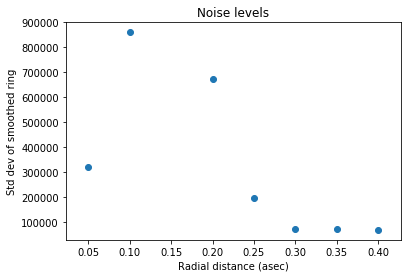

In [4]:
plt.scatter(noise_data["rad_asec"],noise_data["noise"])
plt.title("Noise levels")
plt.xlabel("Radial distance (asec)")
plt.ylabel("Std dev of smoothed ring")
plt.show()

In [5]:
# set the host star's amplitude

host_ampl = noise_data["host_ampl"][0] # all values in col should be the same

In [6]:
# determine what would be a 'five-sigma' signal at each radius

noise_data["five_sig_ampl"] = np.multiply(5.,noise_data["noise"])

In [7]:
# find the 5-sigma contrast by dividing the 5-sigma signal by the host star amplitude

noise_data["five_sig_contrast"] = np.divide(noise_data["five_sig_ampl"],host_ampl)

In [8]:
# convert to mags

noise_data["contrast_mags"] = -2.5*np.log10(noise_data["five_sig_contrast"])

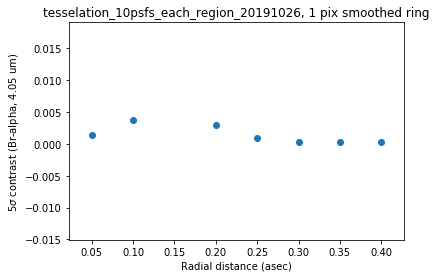

In [9]:
plt.scatter(noise_data["rad_asec"],noise_data["five_sig_contrast"])
plt.xlabel("Radial distance (asec)")
plt.ylabel("5$\sigma$ contrast (Br-alpha, 4.05 um)")
plt.title("tesselation_10psfs_each_region_20191026, 1 pix smoothed ring")
#plt.ylim([16,21])
#plt.gca().invert_yaxis()
plt.show()
#plt.savefig("tesselation_10psfs_each_region_20191026_1_pix_smoothed_ring_mag.pdf")

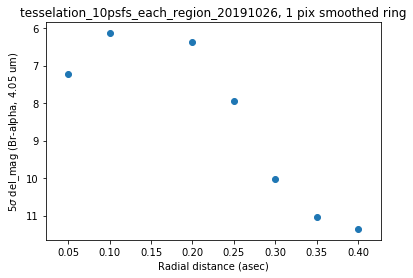

In [13]:
plt.scatter(noise_data["rad_asec"],noise_data["contrast_mags"])
plt.xlabel("Radial distance (asec)")
plt.ylabel("5$\sigma$ del_mag (Br-alpha, 4.05 um)")
plt.title("tesselation_10psfs_each_region_20191026, 1 pix smoothed ring")
#plt.ylim([16,21])
plt.gca().invert_yaxis()
plt.show()
#plt.savefig("tesselation_10psfs_each_region_20191026_1_pix_smoothed_ring_mag.pdf")

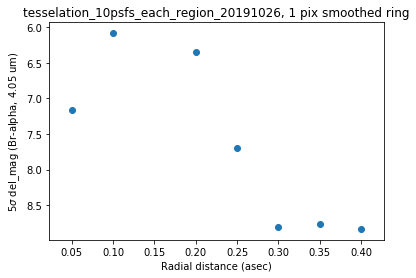

In [10]:
plt.scatter(noise_data["rad_asec"],noise_data["contrast_mags"])
plt.xlabel("Radial distance (asec)")
plt.ylabel("5$\sigma$ del_mag (Br-alpha, 4.05 um)")
plt.title("tesselation_10psfs_each_region_20191026, 1 pix smoothed ring")
#plt.ylim([16,21])
plt.gca().invert_yaxis()
plt.show()
#plt.savefig("tesselation_10psfs_each_region_20191026_1_pix_smoothed_ring_mag.pdf")

# Compare with models (to work on later)

In [8]:
# read in models
# Br-alpha filter is model_data["NB4.05"], in Vega magnitudes

model_data = pd.read_csv("other_data/1gr_data.txt", delim_whitespace=True)

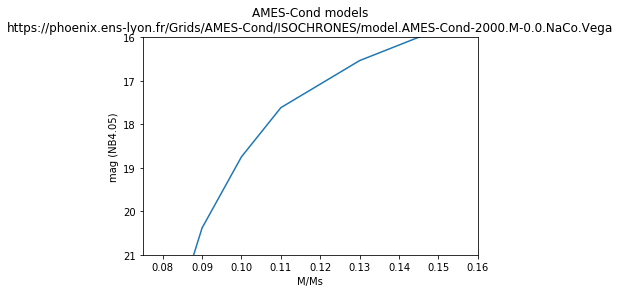

In [68]:
plt.plot(model_data["M/Ms"],model_data["NB4.05"])
plt.xlabel("M/Ms")
plt.ylabel("Abs Vega mag (NB4.05)")
plt.title("AMES-Cond models\nhttps://phoenix.ens-lyon.fr/Grids/AMES-Cond/ISOCHRONES/model.AMES-Cond-2000.M-0.0.NaCo.Vega")
plt.xlim([0.075,0.16])
plt.ylim([16,21])
plt.gca().invert_yaxis()
plt.show()

In [10]:
model_data.keys()

Index(['M/Ms', 'Teff(K)', 'L/Ls', 'lg(g)', 'R(Gcm', 'D', 'Li', 'J', 'H', 'Ks',
       'L'', 'M'', 'NB1.04', 'NB1.08', 'NB1.09', 'NB1.24', 'NB1.26', 'NB1.28',
       'NB1.64', 'NB1.75', 'NB2.12', 'NB2.17', 'NB3.74', 'NB4.05', 'IB2.00',
       'IB2.03', 'IB2.06', 'IB2.09', 'IB2.12', 'IB2.15', 'IB2.18', 'IB2.21',
       'IB2.24', 'IB2.27', 'IB2.30', 'IB2.33', 'IB2.36', 'IB2.39', 'IB2.42',
       'IB2.45', 'IB2.48', '1p6', '1p57', '1p625_q3', '1p625_q4'],
      dtype='object')

In [21]:
df1 = model_data.iloc[:,0:24]

In [22]:
df1

,M/Ms,Teff(K),L/Ls,lg(g),R(Gcm,D,Li,J,H,Ks,...,NB1.09,NB1.24,NB1.26,NB1.28,NB1.64,NB1.75,NB2.12,NB2.17,NB3.74,NB4.05
0,0.0005,111.0,-8.85,3.12,7.13,1.0000,1.0000,37.946,32.828,53.077,...,49.286,46.385,41.881,39.248,42.100,44.958,63.351,60.327,23.530,289.431
1,0.0010,160.0,-8.19,3.39,7.39,1.0000,1.0000,31.299,29.035,44.538,...,37.330,35.603,32.896,31.103,35.649,39.035,51.272,49.087,21.549,275.814
2,0.0020,226.0,-7.56,3.66,7.60,1.0000,1.0000,25.315,25.017,35.698,...,26.427,26.252,24.889,23.697,29.476,32.709,38.798,37.715,19.508,225.160
3,0.0030,270.0,-7.24,3.83,7.69,1.0000,1.0000,23.488,23.519,32.195,...,24.324,23.706,22.839,22.063,26.981,30.437,34.145,33.577,18.634,150.647
4,0.0040,304.0,-7.03,3.95,7.72,1.0000,1.0000,21.978,22.402,29.484,...,22.483,21.456,20.984,20.510,25.221,28.582,30.590,30.401,18.039,98.029
5,0.0050,342.0,-6.83,4.05,7.68,1.0000,1.0000,21.293,21.556,27.638,...,21.953,20.722,20.307,19.901,24.037,27.309,28.291,28.285,17.627,89.628
6,0.0060,377.0,-6.66,4.13,7.65,1.0000,1.0000,20.626,20.733,25.869,...,21.532,19.966,19.616,19.307,22.896,26.115,26.093,26.255,17.230,81.629
7,0.0070,403.0,-6.56,4.21,7.59,1.0000,1.0000,20.142,20.158,24.601,...,21.211,19.402,19.103,18.869,22.130,25.307,24.536,24.811,16.966,76.021
8,0.0080,438.0,-6.42,4.27,7.53,1.0000,1.0000,19.725,19.679,23.392,...,20.836,18.969,18.677,18.521,21.421,24.660,23.167,23.485,16.660,71.472
9,0.0090,464.0,-6.33,4.33,7.47,1.0000,1.0000,19.428,19.329,22.514,...,20.573,18.665,18.377,18.260,20.908,24.153,22.173,22.522,16.442,68.164
